In [2]:
class Syracuse:
    def __init__(self, number: int):
        self.number = number
        self.suite: list[int] = []

    def _recursive(self, n: int):
        self.suite.append(n)
        if n > 1:
            next_n = n // 2 if n % 2 == 0 else n * 3 + 1
            self._recursive(next_n)

    def generate_suite(self) -> list[int]:
        self.suite = []
        self._recursive(self.number)
        return self.suite

    @property
    def fly_time(self) -> int:
        return len(self.suite) - 1

    @property
    def alt_fly_time(self) -> int:
        for i, val in enumerate(self.suite):
            if val < self.number:
                return i
        return self.fly_time

    @property
    def max_alt(self) -> int:
        return max(self.suite)


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def evaluate_syracuse(n: int) -> pd.DataFrame:
    data = []

    for num in range(1, n + 1):
        syracuse = Syracuse(num)
        syracuse.generate_suite()

        data.append({
            "initial": num,
            "flyTime": syracuse.fly_time,
            "altFlyTime": syracuse.alt_fly_time,
            "maxAlt": syracuse.max_alt
        })

    return pd.DataFrame(data)

In [5]:
df = evaluate_syracuse(100)

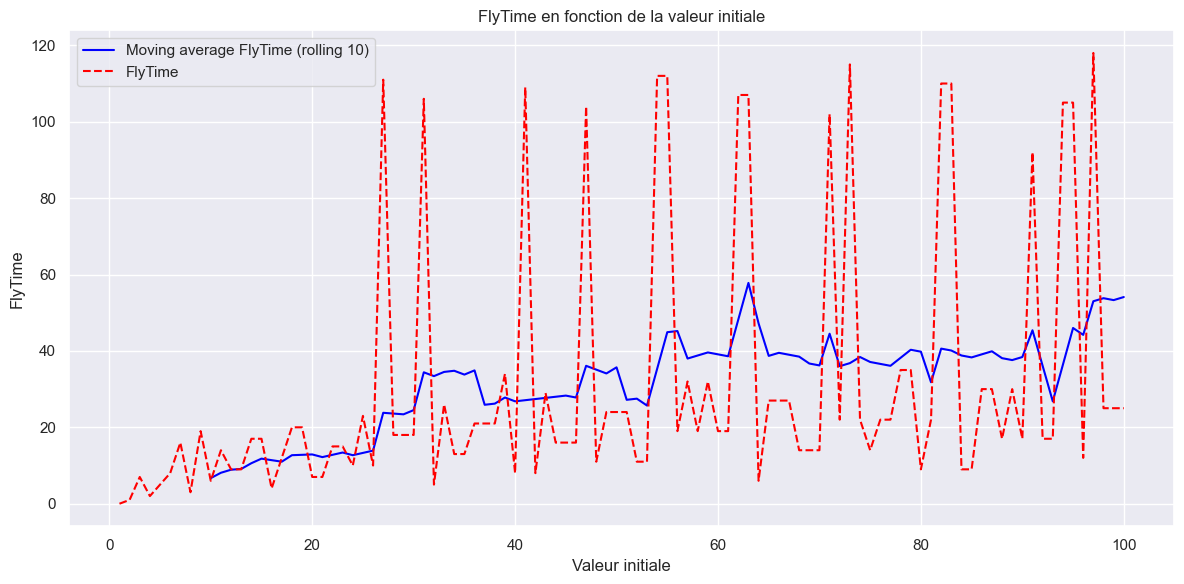

In [16]:
 # Tracer la courbe avec une moyenne glissante (moving average)
plt.figure(figsize=(12, 6))

# Courbe avec une moyenne glissante (moving average)
sns.lineplot(
    x="initial",
    y="flyTime",
    data=df.rolling(window=10, on="initial").mean(),
    label="Moving average FlyTime (rolling 10)",
    color="blue"
)

# Ccourbe sans moyenne glissante
sns.lineplot(
    x="initial",
    y="flyTime",
    data=df,
    label="FlyTime",
    color="red",
    linestyle='--'
)

plt.title("FlyTime en fonction de la valeur initiale")
plt.xlabel("Valeur initiale")
plt.ylabel("FlyTime")
plt.legend()
plt.tight_layout()
plt.show()